In [1]:
# Analyze session logs

In [2]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# LOG_PATH = ROOT / "app/logs"

In [4]:
recent_history = '{"recent_history": [{"sim_time": "2023-02-13 19:30", "summary": "Eddy Lin is at home:office doing review_assignments about Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; while drifting (internal) toward Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; (Eddy continues assignment review, deeply focused on translating academic structures into musical concepts, particularly polyrhythms.) ; Eddy is reviewing assignments, internally developing a musical composition based on academic deadlines and lecture rhythms."}, {"sim_time": "2023-02-13 19:45", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Translating academic rhythms into musical phrases for composition. ; (Eddy is composing music, translating academic rhythms into musical phrases, actively engaged.) ; Eddy continues composing music, translating academic rhythms into musical phrases for his composition project."}, {"sim_time": "2023-02-13 20:00", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Experimenting with different chord voicings and inversions to enhance the emotional impact of the rhythmic motifs. ; (Eddy is composing music, developing harmonic progressions for his composition project.) ; Eddy experiments with chord voicings and inversions to enhance the emotional impact of rhythmic motifs in his composition."}, {"sim_time": "2023-02-13 20:15", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Continue exploring chord voicings and inversions for composition. ; (Eddy is focused on composing music, experimenting with harmonic and rhythmic elements for his project.) ; Eddy continues composing music, exploring chord voicings and inversions for his project."}, {"sim_time": "2023-02-13 20:30", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Continue melodic development and rhythmic integration for composition. ; (Eddy is stably composing music, integrating academic rhythms and exploring melodic development.) ; Eddy continues composing, developing melodic lines and integrating academic rhythmic inspirations into his music."}], "current_datetime": "2023-02-13 20:45"}'
json.loads(recent_history)

{'recent_history': [{'sim_time': '2023-02-13 19:30',
   'summary': 'Eddy Lin is at home:office doing review_assignments about Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; while drifting (internal) toward Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; (Eddy continues assignment review, deeply focused on translating academic structures into musical concepts, particularly polyrhythms.) ; Eddy is reviewing assignments, internally developing a musical composition based on academic deadlines and lecture rhythms.'},
  {'sim_time': '2023-02-13 19:45',
   'summary': 'Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Translating academic rhythms into musical phrases for composition. ; (Eddy is composing music, translating academic rhythms into musical phrases, actively engaged.) ; Eddy continues composing mus

In [5]:
import json
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

ROOT = Path.cwd().parents[1]
print(ROOT)

if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
from app.src.metrics import detect_inherent_drift

sns.set(style="whitegrid")

# -----------------------------------------------------
# LOAD LOGS
# -----------------------------------------------------

LOG_DIR = ROOT / "app/logs"
print(LOG_DIR)

def load_logs(log_dir):
    rows = []
    for f in log_dir.glob("session_*.log"):
        with f.open() as fh:
            for line in fh:
                try:
                    rows.append(json.loads(line))
                except:
                    pass
    return pd.DataFrame(rows)

df = load_logs(LOG_DIR)
df

# Split ORPDA and ORPA
df_orpda = df[df["use_drift"] == True].copy()
df_orpa  = df[df["use_drift"] == False].copy()
print("ORPDA: ", df_orpda.shape[0], "ORPA: ", df_orpa.shape[0])

# -----------------------------------------------------
# Drift detection (inherent drift)
# -----------------------------------------------------


df["detected"] = df.apply(lambda r: detect_inherent_drift(r), axis=1)
df["drift_type_inferred"] = df["detected"].apply(lambda d: d["drift_type_inferred"])
df["drift_score"] = df["detected"].apply(lambda d: d["drift_score"])
df["inherent_drift"] = df["detected"].apply(lambda d: d["inherent_drift"])

df_orpda = df[df.use_drift == True]
df_orpa  = df[df.use_drift == False]


/Users/jaelinlee/Documents/GitHub/Driftville_Agent
/Users/jaelinlee/Documents/GitHub/Driftville_Agent/app/logs
ORPDA:  180 ORPA:  180


In [6]:
df_orpa[df_orpa.inherent_drift==True]

,ts_created,tick,sim_time,agent,use_drift,orpda,detected,drift_type_inferred,drift_score,inherent_drift
131,2025-12-01T21:47:46.617908-05:00,11,2023-02-13 08:45,Eddy Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",behavioral,1.000002e-08,True
143,2025-12-01T21:48:34.732106-05:00,23,2023-02-13 11:45,Eddy Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1254...",behavioral,1.254843e-01,True
164,2025-12-01T21:49:56.390440-05:00,44,2023-02-13 17:00,Eddy Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0878...",behavioral,8.786457e-02,True
180,2025-12-01T21:11:34.000322-05:00,0,2023-02-13 06:00,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2479...",behavioral,2.479318e-01,True
184,2025-12-01T21:11:48.996279-05:00,4,2023-02-13 07:00,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0209...",behavioral,2.099968e-02,True
188,2025-12-01T21:12:06.150098-05:00,8,2023-02-13 08:00,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0772...",behavioral,7.723057e-02,True
190,2025-12-01T21:12:14.402497-05:00,10,2023-02-13 08:30,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0638...",behavioral,6.385676e-02,True
192,2025-12-01T21:12:22.139474-05:00,12,2023-02-13 09:00,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",internal,1.000002e-08,True
203,2025-12-01T21:13:02.072580-05:00,23,2023-02-13 11:45,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",behavioral,1.000002e-08,True
205,2025-12-01T21:13:09.685649-05:00,25,2023-02-13 12:15,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0487...",behavioral,4.872055e-02,True


In [7]:
df_orpda[df_orpda.inherent_drift==True]

,ts_created,tick,sim_time,agent,use_drift,orpda,detected,drift_type_inferred,drift_score,inherent_drift
0,2025-12-01T21:29:35.486915-05:00,0,2023-02-13 06:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0211...",behavioral,2.113034e-02,True
4,2025-12-01T21:29:55.280575-05:00,4,2023-02-13 07:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1876...",behavioral,1.876177e-01,True
5,2025-12-01T21:30:00.244136-05:00,5,2023-02-13 07:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2734...",behavioral,2.734480e-01,True
8,2025-12-01T21:30:14.131148-05:00,8,2023-02-13 08:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1755...",behavioral,1.755676e-01,True
11,2025-12-01T21:30:28.938227-05:00,11,2023-02-13 08:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2290...",behavioral,2.290498e-01,True
...,...,...,...,...,...,...,...,...,...,...
270,2025-12-01T21:03:23.632702-05:00,30,2023-02-13 13:30,Mei Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0461...",behavioral,4.618856e-02,True
272,2025-12-01T21:03:33.566109-05:00,32,2023-02-13 14:00,Mei Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",attentional_leak,1.000001e-08,True
279,2025-12-01T21:04:04.885702-05:00,39,2023-02-13 15:45,Mei Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2332...",behavioral,2.332648e-01,True
296,2025-12-01T21:05:21.096019-05:00,56,2023-02-13 20:00,Mei Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2787...",behavioral,2.787225e-01,True


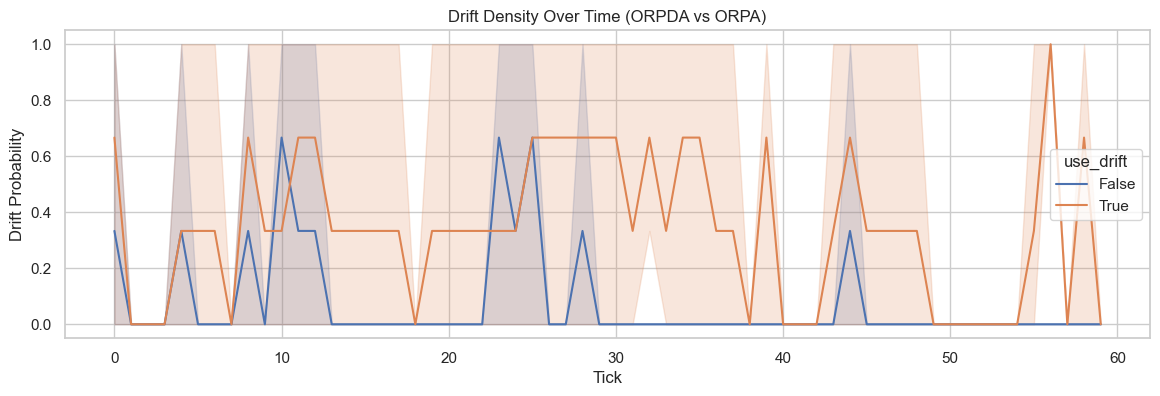

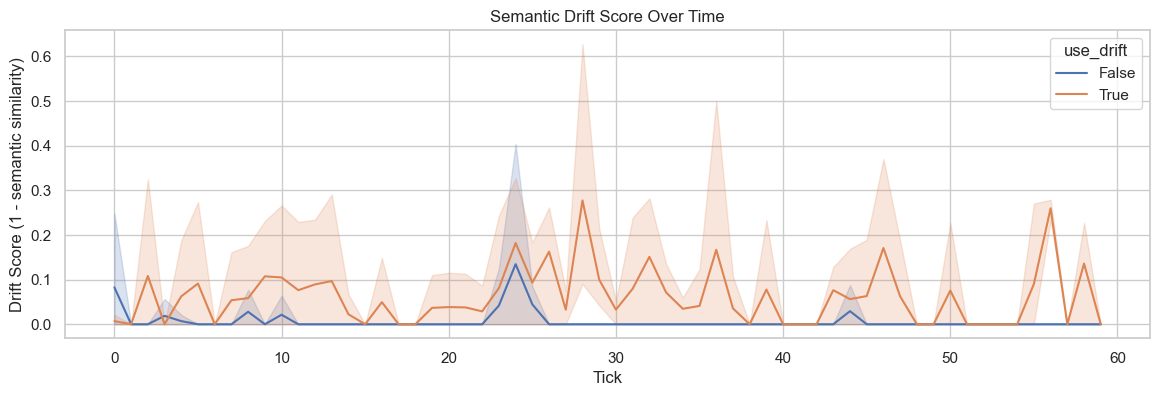

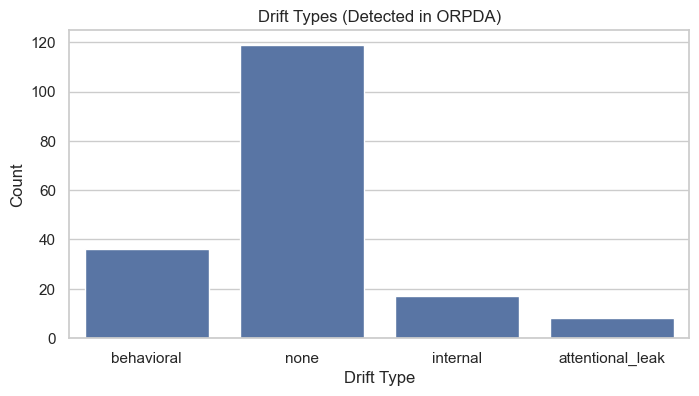

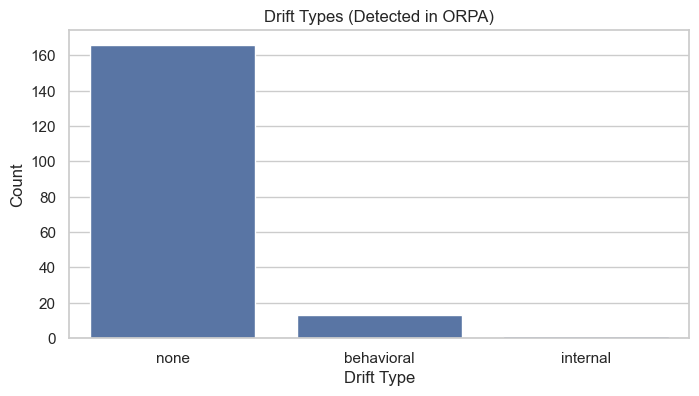

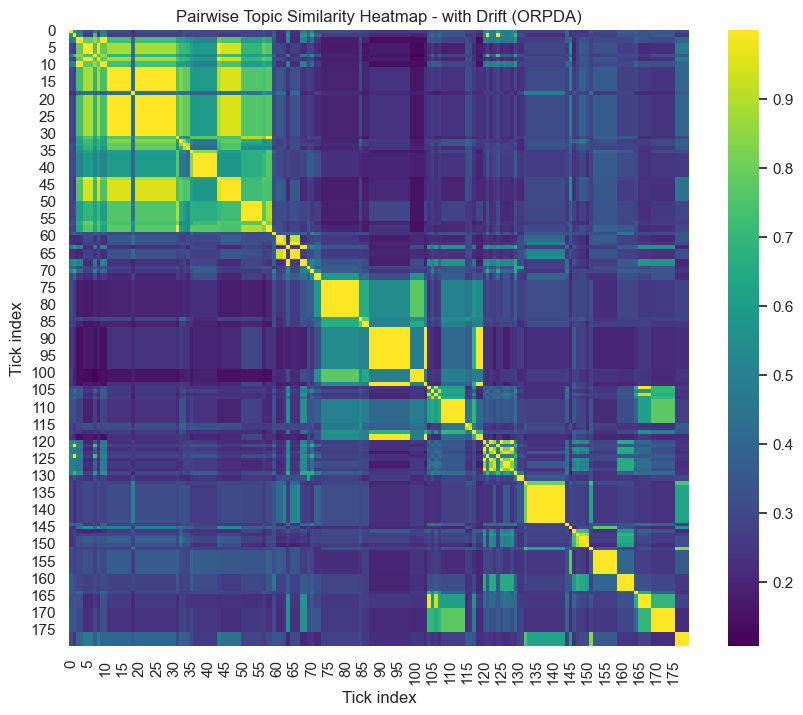

In [14]:
# -----------------------------------------------------
# A. Drift Density Timeline
# -----------------------------------------------------
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="tick", y="inherent_drift", hue="use_drift", estimator="mean")
plt.title("Drift Density Over Time (ORPDA vs ORPA)")
plt.ylabel("Drift Probability")
plt.xlabel("Tick")
plt.show()

# -----------------------------------------------------
# B. Semantic Drift Score Over Time
# -----------------------------------------------------
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="tick", y="drift_score", hue="use_drift", estimator="mean")
plt.title("Semantic Drift Score Over Time")
plt.ylabel("Drift Score (1 - semantic similarity)")
plt.xlabel("Tick")
plt.show()

# -----------------------------------------------------
# C. Drift Type Distribution
# -----------------------------------------------------
plt.figure(figsize=(8,4))
sns.countplot(data=df[df.use_drift==True], x="drift_type_inferred")
plt.title("Drift Types (Detected in ORPDA)")
plt.xlabel("Drift Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df[df.use_drift==False], x="drift_type_inferred")
plt.title("Drift Types (Detected in ORPA)")
plt.xlabel("Drift Type")
plt.ylabel("Count")
plt.show()


# -----------------------------------------------------
# D. Pairwise Topic Shift Heatmap
# -----------------------------------------------------
def extract_topics(row):
    try:
        return row["orpda"]["action_result"].get("topic")
    except:
        return None

df["topic"] = df[df["use_drift"]==True].apply(extract_topics, axis=1)
topics = df["topic"].dropna().tolist()

# embed topics
from app.src.embedding_utils import embed_texts
vecs = embed_texts(topics)

# compute pairwise similarity
mat = np.zeros((len(vecs), len(vecs)))
for i in range(len(vecs)):
    for j in range(len(vecs)):
        a = np.array(vecs[i])
        b = np.array(vecs[j])
        mat[i,j] = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)+1e-8)

plt.figure(figsize=(10,8))
sns.heatmap(mat, cmap="viridis")
plt.title("Pairwise Topic Similarity Heatmap - with Drift (ORPDA)")
plt.xlabel("Tick index")
plt.ylabel("Tick index")
plt.show()


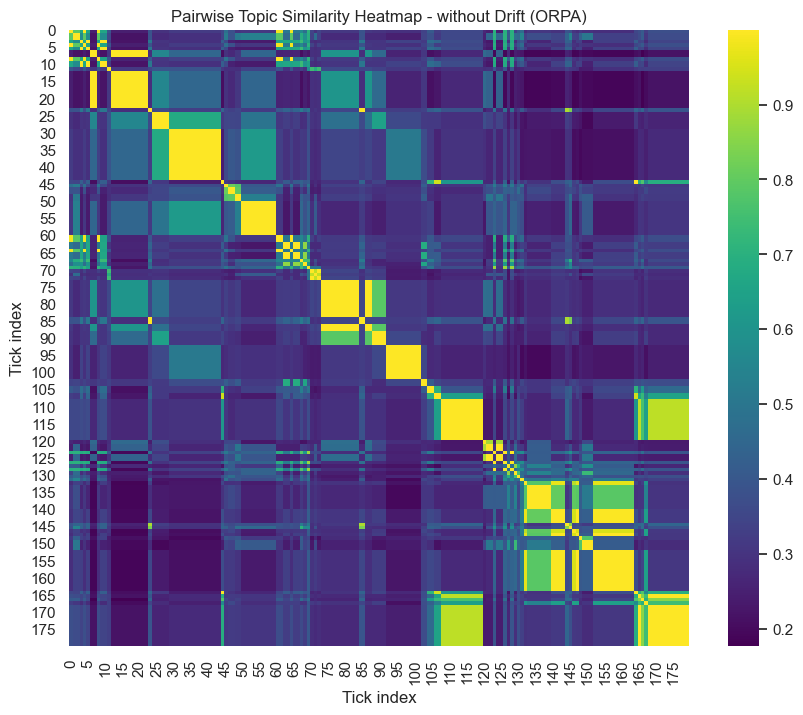

In [13]:
df["topic"] = df[df["use_drift"]==False].apply(extract_topics, axis=1)
topics = df["topic"].dropna().tolist()

# embed topics
from app.src.embedding_utils import embed_texts
vecs = embed_texts(topics)

# compute pairwise similarity
mat = np.zeros((len(vecs), len(vecs)))
for i in range(len(vecs)):
    for j in range(len(vecs)):
        a = np.array(vecs[i])
        b = np.array(vecs[j])
        mat[i,j] = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)+1e-8)

plt.figure(figsize=(10,8))
sns.heatmap(mat, cmap="viridis")
plt.title("Pairwise Topic Similarity Heatmap - without Drift (ORPA)")
plt.xlabel("Tick index")
plt.ylabel("Tick index")
plt.show()

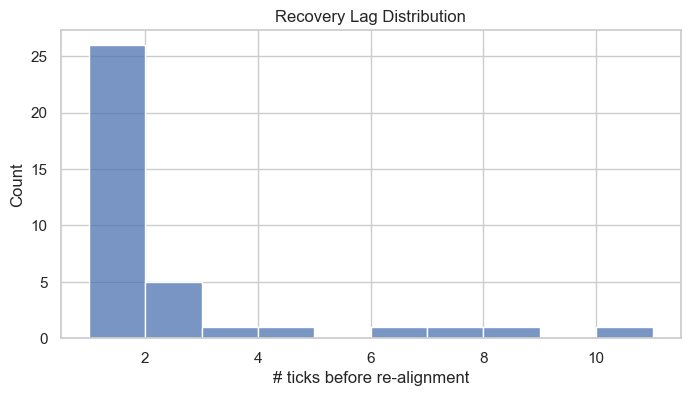

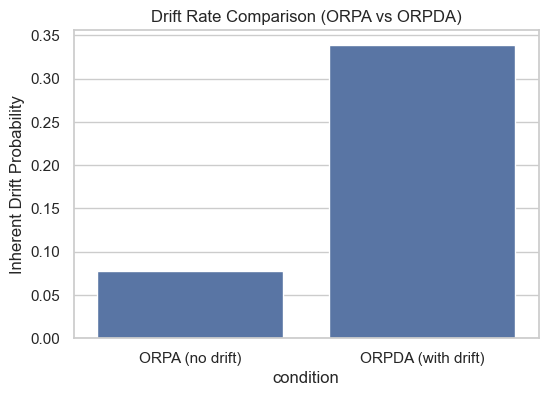

In [9]:
# -----------------------------------------------------
# E. Recovery Lag Distribution
# -----------------------------------------------------
# Tick difference between drift event and next "aligned" plan match
lags = []
current_lag = 0

for _, row in df.iterrows():
    if row["inherent_drift"]:
        current_lag += 1
    else:
        if current_lag > 0:
            lags.append(current_lag)
            current_lag = 0

plt.figure(figsize=(8,4))
sns.histplot(lags, bins=10)
plt.title("Recovery Lag Distribution")
plt.xlabel("# ticks before re-alignment")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------
# F. Drift Probability Comparison
# -----------------------------------------------------
comp = pd.DataFrame({
    "condition": ["ORPA (no drift)", "ORPDA (with drift)"],
    "drift_rate": [
        df_orpa["inherent_drift"].mean(),
        df_orpda["inherent_drift"].mean()
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(data=comp, x="condition", y="drift_rate")
plt.title("Drift Rate Comparison (ORPA vs ORPDA)")
plt.ylabel("Inherent Drift Probability")
plt.show()